# 📊 Math vs Non-Math

Circular Barplot of Non-Mathematical Attacks outperforming Mathematical Attacks

In [1]:
# Imports
from matplotlib.patches             import Circle, RegularPolygon
from matplotlib.path                import Path
from matplotlib.projections.polar   import PolarAxes
from matplotlib.projections         import register_projection
from matplotlib.spines              import Spine
from matplotlib.transforms          import Affine2D
import matplotlib.colors    as mcolors
import numpy                as np
import pandas               as pd
import seaborn              as sns
import matplotlib.pyplot    as plt
import os

In [2]:
TASKS_LIST       = ['bikeMotorbike', 'catDog', 'manWoman']
MATH_ATTACKS     = ['BIM', 'DeepFool', 'FGSM', 'PGD', 'RFGSM', 'Square','TIFGSM']
NON_MATH_ATTACKS = ["BoxBlur","GaussianNoise","GreyScale","InvertColor","RandomBlackBox","SaltPepper"]
CASES            = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']

In [3]:
# Paths
DATA_PATH   = '../results/attacks/evaluation/'
RESULTS_PATH = './figures/'

In [4]:
# Function for DUMB Cases
def rainbow(src_ds, trg_ds, src_b, trg_b, src_m, trg_m):
    if src_ds == trg_ds and src_b == trg_b and src_m == trg_m:
        return "C1"
    elif src_ds == trg_ds and src_b != trg_b and src_m == trg_m:
        return "C2"
    elif src_ds == trg_ds and src_b == trg_b and src_m != trg_m:
        return "C3"
    elif src_ds == trg_ds and src_b != trg_b and src_m != trg_m:
        return "C4"
    elif src_ds != trg_ds and src_b == trg_b and src_m == trg_m:
        return "C5"
    elif src_ds != trg_ds and src_b != trg_b and src_m == trg_m:
        return "C6"
    elif src_ds != trg_ds and src_b == trg_b and src_m != trg_m:
        return "C7"
    elif src_ds != trg_ds and src_b != trg_b and src_m != trg_m:
        return "C8"
    return -1


### 1) Calculate the outrperforming ratio

In [5]:
# Create a DF for each task
taskDFList = []

# For each Task
for t, task in enumerate(TASKS_LIST):

    taskDF = pd.DataFrame(index=[])
    taskDF["case"] = CASES
    taskDF["task"] = [task] * len(CASES)

    print(task.upper())
    #print('-' * 20)

    # Get the Data
    evalDir = DATA_PATH + task + '/'
    mathDFs    = []
    nonMathDFs = []

    for dir in sorted(os.listdir(evalDir)):
        df = pd.read_csv(os.path.join(evalDir, dir))
        df['case'] = df.apply(lambda x: rainbow(x.source_dataset, x.target_dataset,
                            x.source_balancing, x.target_balancing, x.source_model, x.target_model), axis=1)

        # Maths
        if dir.split('.')[0].split('_')[1] in MATH_ATTACKS:
            mathDFs.append(df)
        # Non Maths
        elif dir.split('.')[0].split('_')[1] != 'SplitMergeRGB':
            nonMathDFs.append(df)
    
    # To Store the values
    # When non mathematical attacks are better
    nonMathOutperforming   = 0
    NON_MATH_OUTPERFORMING = []
    # When mathematical attaks are better
    mathOutperforming      = 0
    MATH_OUTPERFOMING      = []

    # For each case
    for case in CASES:
        # To store for the single case
        nonMathOutperformingCase = 0
        mathOutperformingCase    = 0

        for df in nonMathDFs:
            dfc = df.loc[df['case'] == case]
            asr_nm = dfc['asr'].mean()
            
            for dfm in mathDFs:
                dfmc = dfm.loc[dfm['case'] == case]
                asr_m = dfmc['asr'].mean()

                if asr_nm > asr_m:
                    nonMathOutperformingCase +=1
                    nonMathOutperforming     += 1
                elif asr_nm < asr_m:
                    mathOutperformingCase += 1
                    mathOutperforming     += 1

        NON_MATH_OUTPERFORMING.append(nonMathOutperformingCase)
        MATH_OUTPERFOMING.append(mathOutperformingCase)


    for i in range (0,len(CASES)):
        print(f'{CASES[i]}: {NON_MATH_OUTPERFORMING[i]}/{MATH_OUTPERFOMING[i]}')

    print()
    print(f'Non-Math that outperform Math: {nonMathOutperforming}')
    print(f'Math that outperform Non-Math: {mathOutperforming}')
    print()

    # Compute
    taskDF['outperforming'] = NON_MATH_OUTPERFORMING
    taskDF['ratio'] = np.asarray(NON_MATH_OUTPERFORMING)/42

    # Add to list of DF
    taskDFList.append(taskDF)

# Concatenate the DFs
resultsDF = pd.concat(taskDFList)

BIKEMOTORBIKE
C1: 3/39
C2: 3/39
C3: 16/26
C4: 16/26
C5: 3/39
C6: 4/38
C7: 17/25
C8: 17/25

Non-Math that outperform Math: 79
Math that outperform Non-Math: 257

CATDOG
C1: 1/41
C2: 2/40
C3: 18/24
C4: 18/24
C5: 1/41
C6: 3/39
C7: 19/23
C8: 19/23

Non-Math that outperform Math: 81
Math that outperform Non-Math: 255

MANWOMAN
C1: 5/37
C2: 6/36
C3: 22/20
C4: 21/21
C5: 5/37
C6: 4/38
C7: 19/23
C8: 19/23

Non-Math that outperform Math: 101
Math that outperform Non-Math: 235



In [6]:
resultsDF

,case,task,outperforming,ratio
0,C1,bikeMotorbike,3,0.071429
1,C2,bikeMotorbike,3,0.071429
2,C3,bikeMotorbike,16,0.380952
3,C4,bikeMotorbike,16,0.380952
4,C5,bikeMotorbike,3,0.071429
5,C6,bikeMotorbike,4,0.095238
6,C7,bikeMotorbike,17,0.404762
7,C8,bikeMotorbike,17,0.404762
0,C1,catDog,1,0.023810
1,C2,catDog,2,0.047619


### 2) Plot

In [7]:
# Parameters
SMALL_SIZE  = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

Y_LIM_START = -0.75
Y_LIM_END   = 1.25

#COLORS = ["#89CFFD", "#FFCB42", "#68B984", "#BFACE2", "#F0A04B", "#5DA7DB","#E96479"]
COLORS = ["#89CFFD", "#FFCB42", "#68B984"]

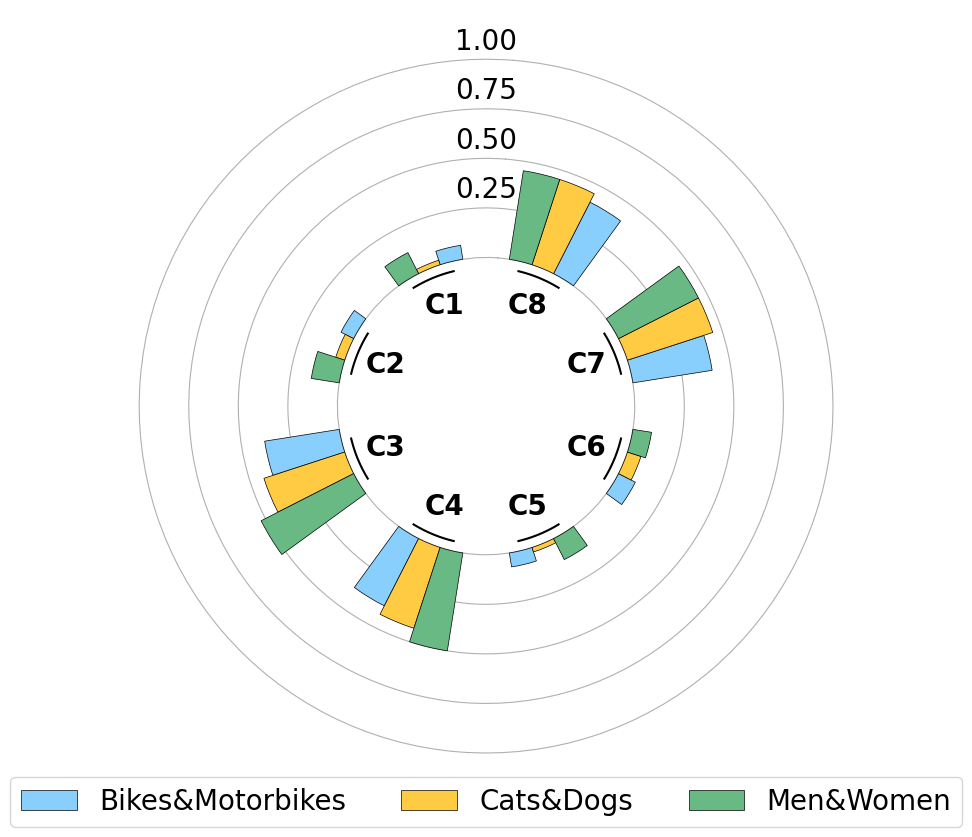

In [8]:
# Get the values from the DF
resultsDF   = resultsDF.sort_values(by=['case', 'task'])
VALUES      = resultsDF["ratio"].values
LABELS      = resultsDF["task"].values 
GROUP       = resultsDF["case"].values

GROUPS_SIZE = [len(list(set(LABELS.tolist())))] * len(list(set(GROUP.tolist())))

# For the Circular Bar Plot
PAD = 2
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)
OFFSET = np.pi / 2 - WIDTH/2

# Calculate offset for bars considering the padding
offset = 0
IDXS = []  
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# FIGURE
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "polar"})
#ax.set_title(d,size=BIGGER_SIZE,pad=10)
ax.set_frame_on(False)

# X AXIS
ax.set_theta_offset(OFFSET)
ax.xaxis.grid(False)
ax.set_xticks([])
# Y AXIS
ax.set_ylim(Y_LIM_START, Y_LIM_END)
ax.set_yticks(list(np.arange(0,Y_LIM_END,0.25)))
ax.set_yticklabels([])

# PLOT
ax.bar(ANGLES[IDXS], VALUES, width=WIDTH, color = COLORS, edgecolor="black", linewidth=0.5, label=LABELS, zorder=2)

# LEGEND
# Handles
handles, labels = ax.get_legend_handles_labels()
uniqueLabels = list(set(labels))
uinqueHandles = [handles[labels.index(label)] for label in uniqueLabels]

sortedHandles, sortedLabels = zip(*sorted(zip(uinqueHandles, uniqueLabels), key=lambda x: x[1]))
legendPosition = (0.5, 0.05)
legendColumns = 3

ax.legend(sortedHandles, ["Bikes&Motorbikes","Cats&Dogs","Men&Women"], loc='upper center', bbox_to_anchor=legendPosition, ncols = legendColumns, fontsize = SMALL_SIZE)

# TEXT 
offset = 0 
for group, size in zip(["C{}".format(i) for i in range (1,9)], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=len(VALUES))
    ax.plot(x1, [-0.05] * len(VALUES), color="black")

    # Add text to indicate group
    ax.text(np.mean(x1), -0.2, group, color="black", fontsize=SMALL_SIZE,fontweight="bold", ha="center", va="center",zorder=2)
    
    offset += size + PAD 
for step in np.arange(0.25, Y_LIM_END, 0.25):
    ax.text(OFFSET - np.pi / 2 + WIDTH, step + 0.05, "{:.2f}".format(step), ha="center", size=SMALL_SIZE)
   
plt.tight_layout()
plt.savefig(RESULTS_PATH + "outperformingNonMathCirculatBarplot.pdf")